In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Customers = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Customer.csv")
Prod_cat_info = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/prod_cat_info.csv")
Transactions = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Transactions.csv")

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
Prod_cat_info.rename(columns = {'prod_sub_cat_code':'prod_subcat_code'}, inplace = True)

In [4]:
Prod_merge = pd.merge(left = Transactions, right = Prod_cat_info, on = ['prod_cat_code','prod_subcat_code'] , how = 'left')

Customer_Final = pd.merge(left = Prod_merge, right = Customers, left_on = 'cust_id', right_on = 'customer_Id', how = 'left')
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [21]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format = '%d-%m-%Y')
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format = '%d-%m-%Y')

## 2. Prepare a summary report for the merged data set.
###    a. Get the column names and their corresponding data types
###    b. Top/Bottom 10 observations
###    c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
###    d. Frequency tables for all the categorical variables

In [27]:
#a.
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [28]:
#b.
Customer_Final.head(10)
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


In [29]:
#c.
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [30]:
#d.
Customer_Final.loc[:, Customer_Final.dtypes == 'object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23044
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11811


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


array([[<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Rate'}>],
       [<AxesSubplot:title={'center':'Tax'}>,
        <AxesSubplot:title={'center':'total_amt'}>]], dtype=object)

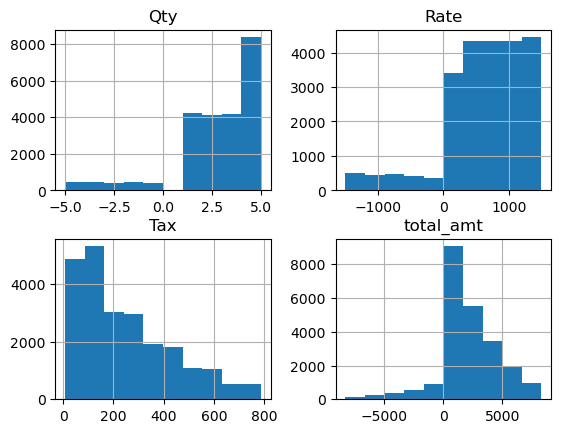

In [34]:
conti_cust = Customer_Final.loc[:,['Qty', 'Rate', 'Tax', 'total_amt']]
conti_cust.hist()

In [51]:
#for categorical variables
categ_var = Customer_Final.loc[:, Customer_Final.dtypes == 'object']

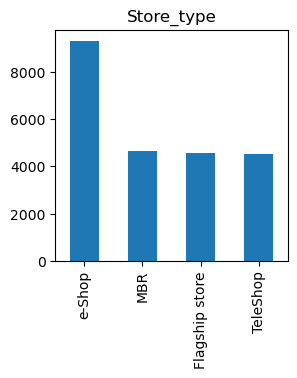

In [53]:
plt.figure(figsize = (3,3))
categ_var['Store_type'].value_counts().plot(kind = 'bar')
plt.title('Store_type')
plt.show()

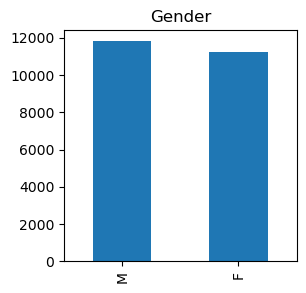

In [54]:
plt.figure(figsize = (3,3))
categ_var['Gender'].value_counts().plot(kind = 'bar')
plt.title('Gender')
plt.show()

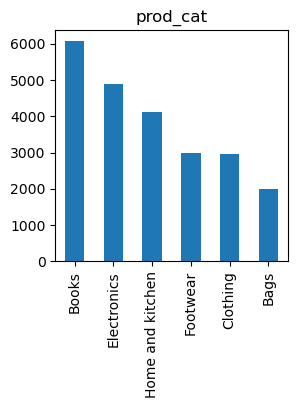

In [55]:
plt.figure(figsize = (3,3))
categ_var['prod_cat'].value_counts().plot(kind = 'bar')
plt.title('prod_cat')
plt.show()

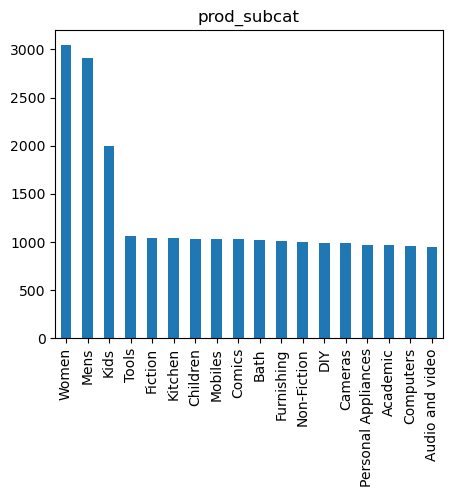

In [58]:
plt.figure(figsize = (5,4))
categ_var['prod_subcat'].value_counts().plot(kind = 'bar')
plt.title('prod_subcat')
plt.show()

## 4. Calculate the following information using the merged dataset :
###    a. Time period of the available transaction data
###    b. Count of transactions where the total amount of transaction was negative


In [64]:
#a.
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()
print('Time period of the available transaction data is from', min_date, 'to', max_date)

Time period of the available transaction data is from 2011-01-02 00:00:00 to 2014-12-02 00:00:00


In [72]:
#b.
Customer_Final.loc[Customer_Final['total_amt'] < 0, 'transaction_id'].count()

2177

## 5. Analyze which product categories are more popular among females vs male customers.

In [75]:
prod_gen_rpt = Customer_Final.groupby(['Gender','prod_cat'])['Qty'].sum().reset_index()
prod_gen_rpt.pivot(index = 'Gender', columns = 'prod_cat', values = 'Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


##  6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [95]:
max_cust = Customer_Final.groupby('city_code')['cust_id'].count().sort_values(ascending = False)
percentage = round((max_cust[4.0] / max_cust.sum())*100,2)
print('City code 4.0 has the max customers and percentage is',percentage)

City code 4.0 has the max customers and percentage is 10.51


## 7. Which store type sells the maximum products by value and by quantity?


In [100]:
Customer_Final.groupby('Store_type')[['Rate', 'Qty']].sum().sort_values(by = 'Qty', ascending = False)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763
MBR,2953253,11194
Flagship store,2941557,11133
TeleShop,2834420,10984


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [106]:
prod_smry = Customer_Final.pivot_table(index = 'prod_cat',columns = 'Store_type',values = 'total_amt', aggfunc = 'sum')
prod_smry.loc[['Clothing','Electronics'],'Flagship store'].sum()

3409559.27

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [114]:
categ_sumry = Customer_Final.pivot_table(index = 'prod_cat', columns = 'Gender', values = 'total_amt', aggfunc = 'sum')
categ_sumry.loc['Electronics','M']

5703109.425

## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [133]:
positive_tran = Customer_Final.loc[Customer_Final['total_amt'] > 0]
positive_tran
unique_tran = positive_tran.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_tran
uni_tran_cnt = unique_tran.groupby('cust_id')['transaction_id'].count().reset_index()
uni_tran_cnt
uni_tran_cnt[uni_tran_cnt['transaction_id'] > 10]

#There is no customer who have more than 10 unique transactions.

,cust_id,transaction_id


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?
### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [165]:
#a.
now = pd.Timestamp('today')
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, 
                                                    Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,49.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,41.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0


In [172]:
#a.
Customer_Final['Age_catg'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],
                                   include_lowest=True)
Customer_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat,Age_catg
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,49.0,47-57,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,41.0,36-46,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35,25-35


In [178]:
#a.
prod_age_grp = Customer_Final.groupby(['Age_catg','prod_cat'])['total_amt'].sum()
prod_age_grp.loc['25-35',['Electronics','Books']].sum()

6100352.505

In [188]:
#b.
date_smry = Customer_Final.groupby('tran_date')['total_amt'].sum().reset_index()

date_smry[(date_smry['tran_date'] >= '2014-01-01') & (date_smry['tran_date'] <= '2014-03-01')]['total_amt'].sum()

1409397.6649999998